<a href="https://colab.research.google.com/github/u6yuvi/DL-POC/blob/main/NLP/LayoutParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install layoutparser

     |████████████████████████████████| 19.1MB 26.5MB/s 
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 4.0MB 8.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=8c033829f557a268c0dfec374d247991d5ce93030944694f9f583bb48b811b28
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.1.3#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.1.3) to /tmp/pip-install-6l2gzf8x/detectron2
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-6l2gzf8x/detectron2
  Running command git checkout -q bd2ea475b693a88c063e05865d13954d50242857
  Created wheel for detectron2: filename=detectron2-0.1.3-cp36-cp36m-linux_x86_64.whl size=4505190 sha256=66d9cfd7d19e2660d6378f8d746609f92487868c9ae9d0e3e85d6e40fc432452
  Stored in directory: /tmp/pip-ephem-wheel-cache-wp6c_v7s/wheels/c8/5b/62/de418127880b3ae732e2958ce519d5f4672219f95e50e83948
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200929-cp36-none-any.whl size=43976 sha256=91a2a31f156a560b3beaf74d6b2a353c46623f37276a4768be0c6c7a441b26f4
  Stored in directory: /root/.cache/pip/wheels/89/55/50/16407a05a12ac87ccf596350724c707f5ca77809b25f802b93
Successfully built detectron2 fvcore


In [ ]:
import layoutparser as lp

In [ ]:
ls

sample_data/


In [ ]:
model = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                              label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

config.yaml?dl=1: 8.19kB [00:01, 5.64kB/s]
model_final.pth?dl=1: 351MB [00:26, 13.2MB/s]                           


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2020-10-08 22-50-33.png to Screenshot from 2020-10-08 22-50-33.png


In [ ]:
import cv2
image1 = cv2.imread("Screenshot from 2020-10-08 22-50-33.png")
image1 = image1[..., ::-1] 
# image2 = cv2.imread("Screenshot from 2020-10-02 01-14-45.png")
# image2 = image2[..., ::-1] 
# image3 = cv2.imread("Screenshot from 2020-10-02 01-01-44.png")
# image3 = image3[..., ::-1] 

In [ ]:
result1 = model.detect(image1)
# result2 = model.detect(image2)
# result3 = model.detect(image3)

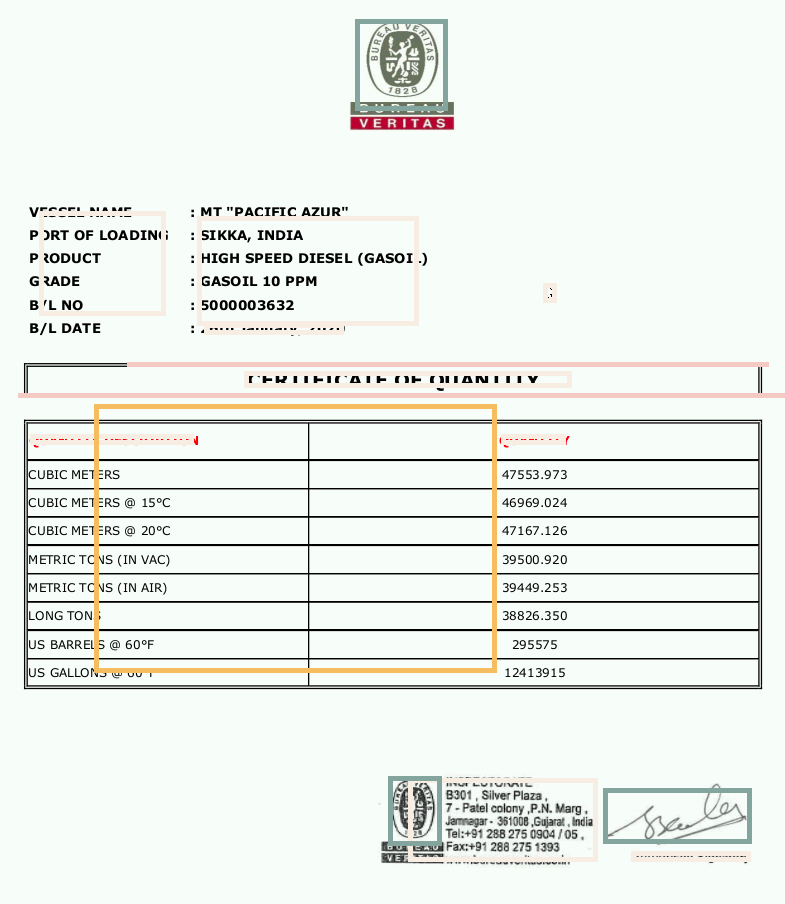

In [ ]:
lp.draw_box(image1,result1,box_width = 5)

In [ ]:
result1

[TextBlock(block=Rectangle(x_1=408.6130676269531, y_1=778.3530883789062, x_2=597.2349243164062, y_2=861.294921875), text=, id=None, type=Title, parent=None, next=None, score=0.9998024106025696),
 TextBlock(block=Rectangle(x_1=30.870386123657227, y_1=434.8337707519531, x_2=193.64796447753906, y_2=444.6935729980469), text=, id=None, type=Title, parent=None, next=None, score=0.999693751335144),
 TextBlock(block=Rectangle(x_1=197.12210083007812, y_1=216.04220581054688, x_2=418.10516357421875, y_2=325.558349609375), text=, id=None, type=Title, parent=None, next=None, score=0.999333918094635),
 TextBlock(block=Rectangle(x_1=18.644947052001953, y_1=393.90777587890625, x_2=785.0, y_2=397.5520324707031), text=, id=None, type=5, parent=None, next=None, score=0.9968000650405884),
 TextBlock(block=Rectangle(x_1=501.76177978515625, y_1=434.64642333984375, x_2=565.5877685546875, y_2=444.859375), text=, id=None, type=Title, parent=None, next=None, score=0.9960162043571472),
 TextBlock(block=Rectangle

In [ ]:
lp.draw_box(image2,result2,box_width = 5)

In [ ]:
lp.draw_box(image3,result3,box_width = 5)

In [ ]:
text_blocks = lp.Layout([b for b in result if b.type=='Text'])
figure_blocks = lp.Layout([b for b in result if b.type=='Figure'])

In [ ]:
text_blocks = lp.Layout([b for b in result if b.type=='List'])

In [ ]:
text_blocks

In [ ]:
result

In [ ]:
lp.draw_box(image, result,
            box_width=3, 
            show_element_id=True)

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
text_blocks

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

Table Detection


In [ ]:
!git clone https://github.com/mdv3101/CDeCNet

In [ ]:
!ls

In [ ]:
!ls CDeCNet/

In [ ]:
!pip3 install mmcv==0.5.4

In [ ]:
!pip3 install addict

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git

In [ ]:
!ls

In [ ]:
!pip install yapf

In [ ]:
from CDeCNet.mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [ ]:
!pip install ghostscript

In [ ]:
import ghostscript

def pdf2jpeg(pdf_input_path, jpeg_output_path):
    args = ["pdf2jpeg", # actual value doesn't matter
            "-dNOPAUSE",
            "-sDEVICE=jpeg",
            "-r144",
            "-sOutputFile=" + jpeg_output_path,
            pdf_input_path]
    ghostscript.Ghostscript(*args)

In [ ]:
!brew install ghostscript